## import Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [94]:
# read data

train_data = pd.read_csv('Train.csv' , index_col = 'Item_Identifier')
test_data = pd.read_csv('Test.csv', index_col = 'Item_Identifier')


## Data exploration and visualization

In [95]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [96]:
train_data.shape

(8523, 11)

In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [98]:
train_data.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [99]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [100]:
#missing value percent
total_cells = np.product(train_data.shape)
missing_cells = train_data.isnull().sum()
percent = (missing_cells.sum() / total_cells) * 100
percent

4.131067805830214

In [101]:
train_data.duplicated().sum()

0

In [102]:
y = train_data.Item_Outlet_Sales
X = train_data.drop(['Item_Outlet_Sales'] , axis = 1)

In [103]:
X.shape , y.shape

((8523, 10), (8523,))

In [148]:
X_new = X.copy()
X_test = test_data.copy()
X_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


array([[<AxesSubplot: title={'center': 'Item_Weight'}>,
        <AxesSubplot: title={'center': 'Item_Visibility'}>],
       [<AxesSubplot: title={'center': 'Item_MRP'}>,
        <AxesSubplot: title={'center': 'Outlet_Establishment_Year'}>]],
      dtype=object)

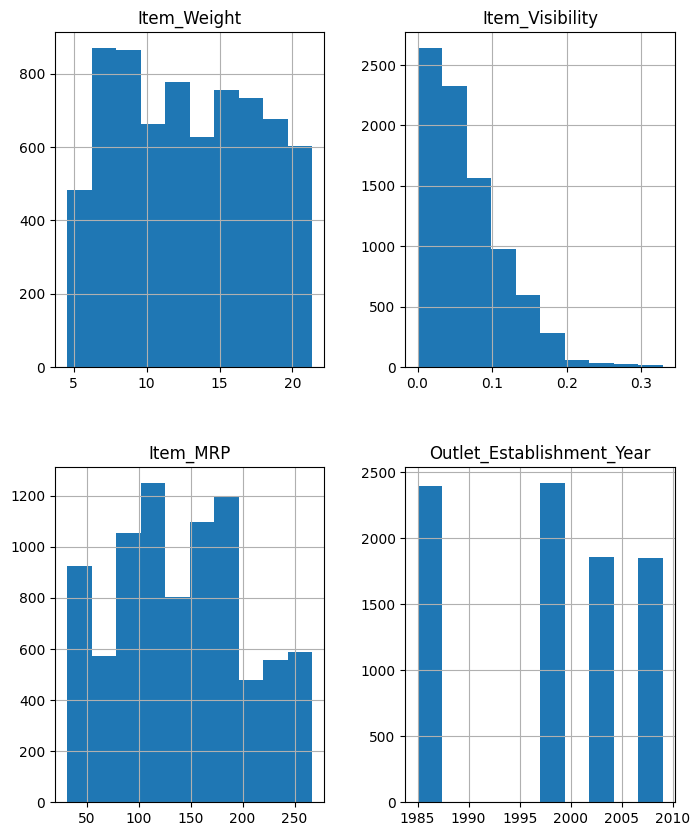

In [109]:
X_new[numeric_col].hist(figsize=[8,10])

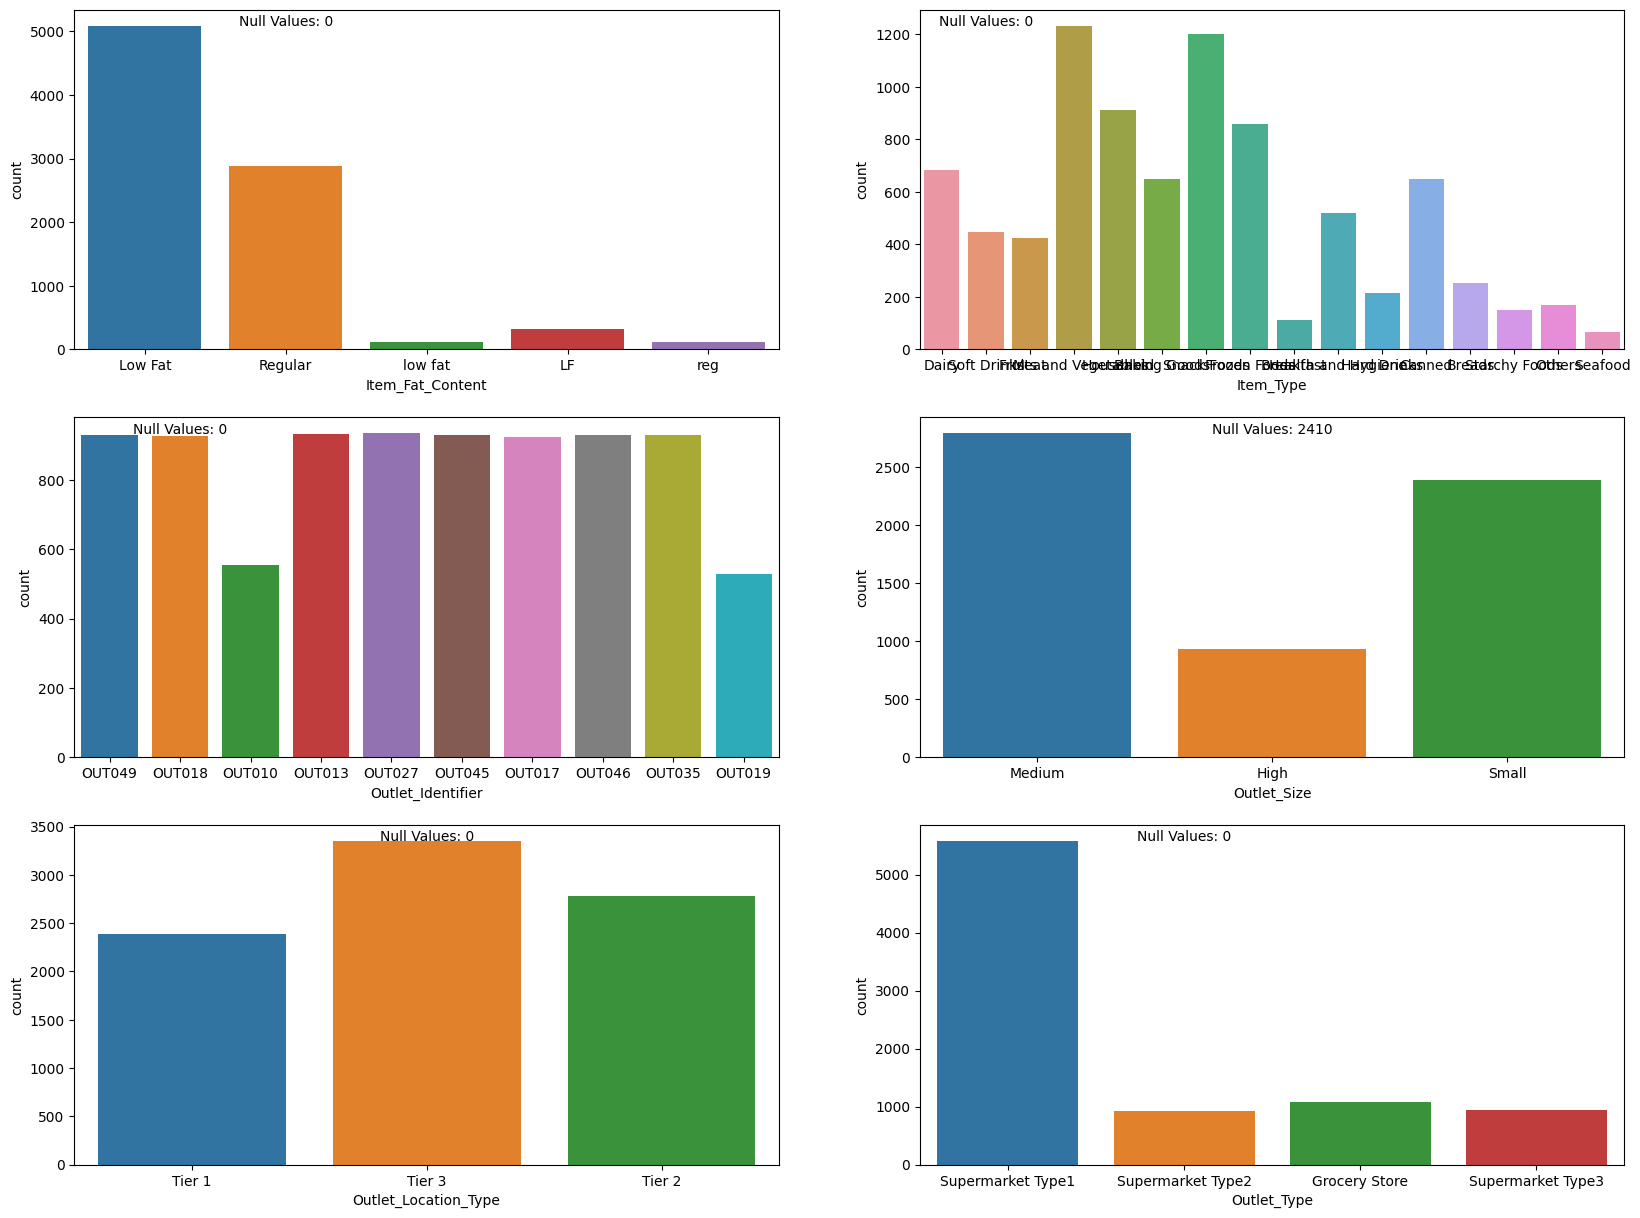

In [110]:
plt.figure(figsize=(20,15))

for i in range(len(categorical_col)):
    null_count = X_new[categorical_col[i]].isnull().sum()
    plt.subplot(3,2,i+1)
    sns.countplot(data=X_new , x=categorical_col[i])
    plt.text(1, X_new[categorical_col[i]].value_counts().max(), f'Null Values: {null_count}', ha='center')

In [112]:
corr = train_data.select_dtypes(include=['number']).corr()

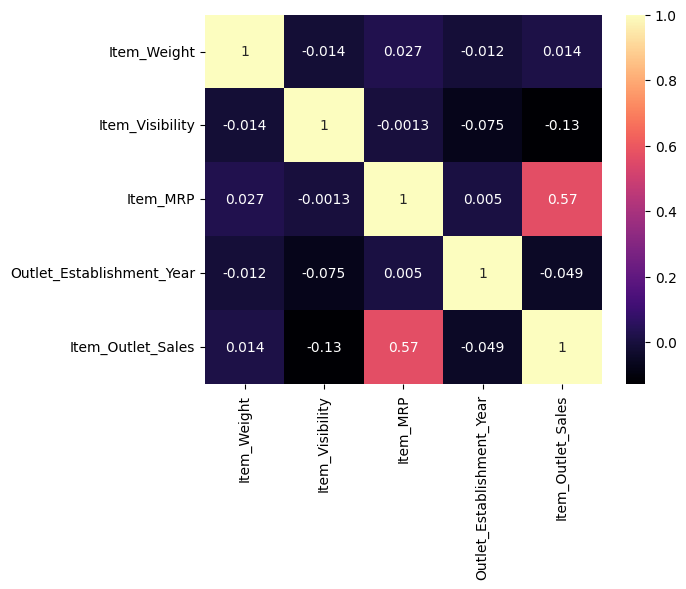

In [113]:
sns.heatmap(corr, annot=True, cmap='magma')
plt.show()

In [115]:
# most products types those made sales
most_sales_types = train_data.groupby('Item_Type')['Item_Outlet_Sales'].sum()
# sort them
print(most_sales_types.sort_values())

Item_Type
Seafood                  1.488682e+05
Breakfast                2.322990e+05
Others                   3.255176e+05
Starchy Foods            3.514013e+05
Hard Drinks              4.577934e+05
Breads                   5.532372e+05
Soft Drinks              8.928977e+05
Meat                     9.175656e+05
Health and Hygiene       1.045200e+06
Baking Goods             1.265525e+06
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Household                2.055494e+06
Snack Foods              2.732786e+06
Fruits and Vegetables    2.820060e+06
Name: Item_Outlet_Sales, dtype: float64


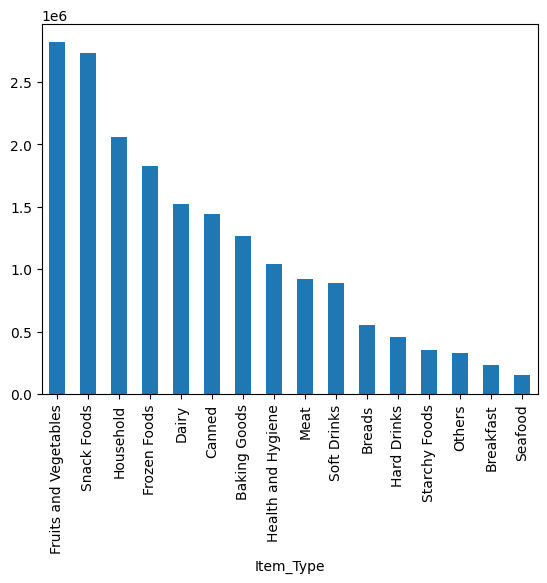

In [116]:
most_sales_types.sort_values(ascending = False ).plot.bar()
plt.show()

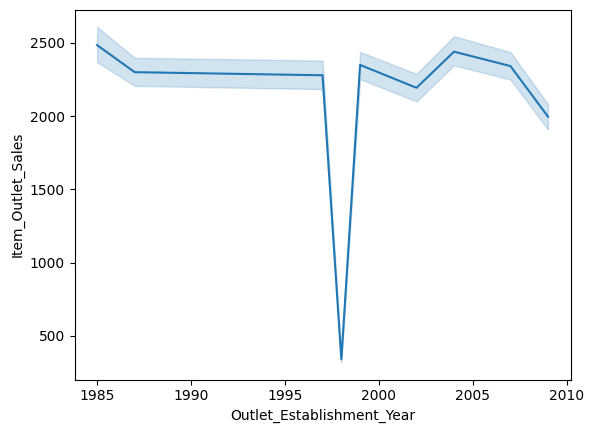

In [117]:
# Sales by years
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_data)
plt.show()

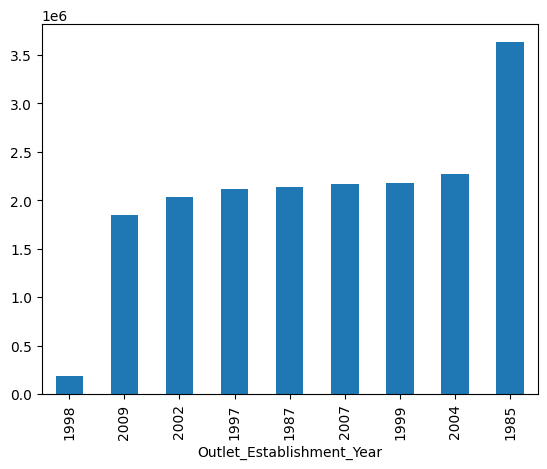

In [118]:
# barplot to find that gap between years 
specific_years = train_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
specific_years.sort_values().plot.bar()
plt.show()

In [119]:
# show that year records
train_data[train_data['Outlet_Establishment_Year'] == 1998 ]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...
NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384


In [120]:
# do more investigation and find some features are the same  
train_data[(train_data['Outlet_Establishment_Year'] == 1998 ) & 
           (train_data['Outlet_Type'] == 'Grocery Store')]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...
NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384


In [121]:
#find the reason of that gap 
Sales = train_data.groupby(['Outlet_Type','Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()
print(Sales)

Outlet_Type        Outlet_Establishment_Year
Grocery Store      1985                         1.796941e+05
                   1998                         1.883402e+05
Supermarket Type1  1987                         2.142664e+06
                   1997                         2.118395e+06
                   1999                         2.183970e+06
                   2002                         2.036725e+06
                   2004                         2.268123e+06
                   2007                         2.167465e+06
Supermarket Type2  2009                         1.851823e+06
Supermarket Type3  1985                         3.453926e+06
Name: Item_Outlet_Sales, dtype: float64


## Data preparation and cleaning

In [122]:
X_new['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [123]:
X_new['Item_Fat_Content'] = X_new['Item_Fat_Content'].map({'low fat':'Low Fat','Low Fat':'Low Fat',
                                                          'LF':'Low Fat','reg':'Regular','Regular':'Regular'})

In [124]:
X_new['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [125]:
from sklearn.model_selection import train_test_split
 
X_train , X_valid , y_train , y_valid = train_test_split(X_new , y , test_size = 0.2,random_state = 0)

X_train.shape , X_valid.shape , y_train.shape , y_valid.shape

((6818, 10), (1705, 10), (6818,), (1705,))

In [126]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

reduced_categ = [col for col in reduced_X_train.columns
                if reduced_X_train[col].nunique() <=16 and reduced_X_train[col].dtype == 'object']
print(len(reduced_X_train.columns))


8


In [127]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehotencoder' , OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers = [
    ('categorical' , categorical_transformer , reduced_categ )
])

## Define the Models

In [128]:

# Linear Regression model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

# Random Forest model
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=150 ,min_samples_split=25, random_state=0)

# Extreme Gradient Boosting model
from xgboost import XGBRegressor
xgbr = XGBRegressor()
models = [{'Linear Regression': linear_reg} , {'Random Forest':random_forest},
         {'XGBoost':xgbr}]

## Model evaluation and selection

#### score from drop columns with missing values

In [129]:
from sklearn.metrics import mean_absolute_error
    
for i in models:
    for key, value in i.items():
        my_pipeline = Pipeline(steps=[
        ('preprocessor' , preprocessor),
        ('model', value)])
        my_pipeline.fit(reduced_X_train , y_train)
        y_pred = my_pipeline.predict(reduced_X_valid)
    
        mae = mean_absolute_error(y_valid , y_pred).round(2)
        print(f'Model {key} MAE: {mae}')
        print('-'*40)
 

Model Linear Regression MAE: 1119.9
----------------------------------------
Model Random Forest MAE: 1134.1
----------------------------------------
Model XGBoost MAE: 1136.95
----------------------------------------


#### Use imputer insted of droping missing values

In [130]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# preprocessing for numerical data
numerical_transformer = SimpleImputer()


#preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer ', SimpleImputer(strategy='most_frequent')),
    ('onehotencoder' , OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer , numeric_col),
    ('categorical' , categorical_transformer , categorical_col ),
])

#### Score from Imputation

In [131]:

for i in models:
    for key, value in i.items():
        my_pipeline = Pipeline(steps=[
        ('preprocessor' , preprocessor),
        ('model', value)])
        my_pipeline.fit(X_train , y_train)
        y_pred = my_pipeline.predict(X_valid)
    
        mae = mean_absolute_error(y_valid , y_pred).round(2)
        print(f'Model {key} MAE: {mae}')
        print('-'*40)


Model Linear Regression MAE: 852.4
----------------------------------------
Model Random Forest MAE: 787.32
----------------------------------------
Model XGBoost MAE: 840.16
----------------------------------------


## Model deployment

In [133]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map({'low fat':'Low Fat','Low Fat':'Low Fat',
                                                          'LF':'Low Fat','reg':'Regular','Regular':'Regular'})

In [134]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [145]:
 my_pipeline = Pipeline(steps=[
        ('preprocessor' , preprocessor),
        ('model', random_forest)])
preds_test = my_pipeline.predict(X_test)

In [147]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)